In [12]:
import torch

In [13]:
# 1. Finding Eigenvalues

# Define the matrix A (must be float type)
A = torch.tensor([[2., 1.], [2., 3.]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eig(A)

# Convert to real values if imaginary part is negligible (for real matrices)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

print("Eigenvalues:", eigenvalues)
print("Eigenvectors (columns):")
print(eigenvectors)

# Verification for first eigenvalue/eigenvector pair
v = eigenvectors[:, 0]  # First eigenvector
lambda_ = eigenvalues[0]  # First eigenvalue
print("\nVerification for first eigenvalue/eigenvector:")
print("A * v:", A @ v)
print("lambda * v:", lambda_ * v)

Eigenvalues: tensor([1.0000, 4.0000])
Eigenvectors (columns):
tensor([[-0.7071, -0.4472],
        [ 0.7071, -0.8944]])

Verification for first eigenvalue/eigenvector:
A * v: tensor([-0.7071,  0.7071])
lambda * v: tensor([-0.7071,  0.7071])


In [14]:
# 2. Decomposing Matrices

# Define the matrix A (must be float type)
A = torch.tensor([[2., 4.], [2., 9.]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eig(A)

# Convert complex results to real (since A is real and symmetric)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

# Form W (eigenvectors as columns)
W = eigenvectors

# Form Sigma (diagonal matrix of eigenvalues)
Sigma = torch.diag(eigenvalues)

# Compute W inverse
W_inv = torch.linalg.inv(W)

# Reconstruct A = W @ Sigma @ W_inv
A_reconstructed = W @ Sigma @ W_inv

print("Original A:")
print(A)
print("Reconstructed A (W * Sigma * W^-1):")
print(A_reconstructed)

Original A:
tensor([[2., 4.],
        [2., 9.]])
Reconstructed A (W * Sigma * W^-1):
tensor([[2., 4.],
        [2., 9.]])


In [15]:
# 3. Operations on Eigendecompositions

# Define the matrix A (must be float type)
A = torch.tensor([[2., 5.], [3., 7.]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eig(A)

# Convert complex results to real (since A is real and symmetric)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

# Form W (eigenvectors as columns)
W = eigenvectors

# Form Sigma (diagonal matrix of eigenvalues)
Sigma = torch.diag(eigenvalues)

# Compute W inverse
W_inv = torch.linalg.inv(W)

# Compute A^5 = W * Sigma^5 * W^-1
Sigma_5 = torch.diag(eigenvalues**5)
A_5 = W @ Sigma_5 @ W_inv
print("A^5 using eigendecomposition:")
print(A_5)

# Compute A^-1 = W * Sigma^-1 * W^-1
Sigma_inv = torch.diag(1 / eigenvalues)  # Inverse of diagonal matrix
A_inv = W @ Sigma_inv @ W_inv
print("\nA^-1 using eigendecomposition:")
print(A_inv)

# Verify with direct computation
print("\nVerification A^5 (direct):")
print(torch.linalg.matrix_power(A, 5))
print("Verification A^-1 (direct):")
print(torch.linalg.inv(A))

A^5 using eigendecomposition:
tensor([[14356.9961, 34024.9922],
        [20414.9941, 48381.9883]])

A^-1 using eigendecomposition:
tensor([[-7.0000,  5.0000],
        [ 3.0000, -2.0000]])

Verification A^5 (direct):
tensor([[14357., 34025.],
        [20415., 48382.]])
Verification A^-1 (direct):
tensor([[-7.0000,  5.0000],
        [ 3.0000, -2.0000]])


In [16]:
# 4. Eigendecompositions of Symmetric Matrices

# Define symmetric matrix A (must be float type)
A = torch.tensor([[5., 2.], [2., 5.]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eigh(A)  # Using eigh() for symmetric matrices

# Form W (orthogonal matrix of eigenvectors)
W = eigenvectors

# Form Sigma (diagonal matrix of eigenvalues)
Sigma = torch.diag(eigenvalues)

# Verify orthogonality: W^T @ W = I
print("W^T @ W (should be identity):")
print(W.T @ W)

# Decompose A = W @ Sigma @ W^T
A_reconstructed = W @ Sigma @ W.T
print("\nOriginal A:")
print(A)
print("Reconstructed A (W @ Sigma @ W^T):")
print(A_reconstructed)

W^T @ W (should be identity):
tensor([[1.0000, 0.0000],
        [0.0000, 1.0000]])

Original A:
tensor([[5., 2.],
        [2., 5.]])
Reconstructed A (W @ Sigma @ W^T):
tensor([[5.0000, 2.0000],
        [2.0000, 5.0000]])


Gershgorin discs:
Disc 1: center = 2.0, radius = 0.5999999046325684, interval = [1.4000000953674316, 2.5999999046325684]
Disc 2: center = 12.0, radius = 0.6999998092651367, interval = [11.300000190734863, 12.699999809265137]
Disc 3: center = 25.0, radius = 1.0, interval = [24.0, 26.0]
Disc 4: center = 19.0, radius = 1.2000007629394531, interval = [17.799999237060547, 20.200000762939453]

Actual eigenvalues: tensor([ 1.9895, 25.0483, 18.9722, 11.9900])


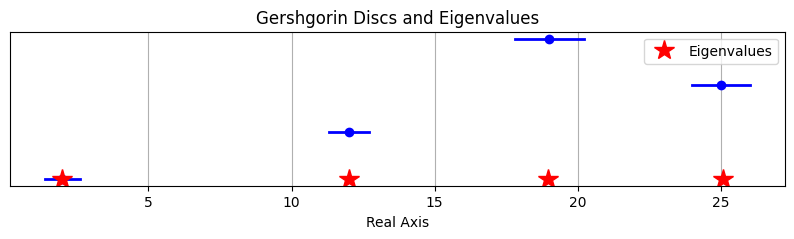

In [17]:
# 5. Gershgorin Circle Theorem

import torch
import matplotlib.pyplot as plt

# Define the matrix A
A = torch.tensor([[2.0, 0.3, 0.2, 0.1],
                 [0.2, 12.0, 0.2, 0.3],
                 [0.3, 0.2, 25.0, 0.5],
                 [0.4, 0.3, 0.5, 19.0]])

# Compute Gershgorin radii
n = A.shape[0]
centers = torch.diag(A)  # Diagonal elements
radii = torch.sum(torch.abs(A), dim=1) - torch.abs(centers)  # Sum of off-diagonal absolute values

# Print Gershgorin discs
print("Gershgorin discs:")
for i in range(n):
    print(f"Disc {i+1}: center = {centers[i].item()}, radius = {radii[i].item()}, "
          f"interval = [{centers[i].item() - radii[i].item()}, {centers[i].item() + radii[i].item()}]")

# Compute actual eigenvalues
eigenvalues = torch.linalg.eigvals(A)
print("\nActual eigenvalues:", eigenvalues.real)

# Visualize Gershgorin discs
plt.figure(figsize=(10, 2))
for i in range(n):
    plt.plot([centers[i].item() - radii[i].item(), centers[i].item() + radii[i].item()],
             [i, i], 'b-', linewidth=2)
    plt.plot(centers[i].item(), i, 'bo')

for ev in eigenvalues.real:
    plt.plot(ev.item(), 0, 'r*', markersize=15,
             label='Eigenvalues' if ev == eigenvalues.real[0] else "")

plt.yticks([])
plt.xlabel("Real Axis")
plt.title("Gershgorin Discs and Eigenvalues")
plt.legend()
plt.grid(True)
plt.show()